# Model metrics

We are going to use logistic regression since our dependent variable (became_law.signed) is binary.  

In [1]:
# Preamble
%run Preamble.ipynb

# Load data
bills_df = pd.read_csv("FinalDataSets\\final_data.csv")
bills_df_house = pd.read_csv("FinalDataSets\\final_data_house.csv")
bills_df_senate = pd.read_csv("FinalDataSets\\final_data_senate.csv")
bills_df_both = pd.read_csv("FinalDataSets\\final_data_both.csv")

In [2]:
# train_test_split (use the same splits for all the data)

# random seed tts
rs_tts = 440

# all
X = bills_df.drop("became_law.signed", axis=1)
y = bills_df["became_law.signed"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    shuffle = True,
    random_state = rs_tts,
    test_size = 0.2,
    stratify = y)

# House
X_h = bills_df_house.drop("became_law.signed", axis=1)
y_h = bills_df_house["became_law.signed"]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h,
    shuffle = True,
    random_state = rs_tts,
    test_size = 0.2,
    stratify = y_h)

# Senate
X_s = bills_df_senate.drop("became_law.signed", axis=1)
y_s = bills_df_senate["became_law.signed"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s,
    shuffle = True,
    random_state = rs_tts,
    test_size = 0.2,
    stratify = y_s)

# both
X_b = bills_df_both.drop("became_law.signed", axis=1)
y_b = bills_df_both["became_law.signed"]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b,
    shuffle = True,
    random_state = rs_tts,
    test_size = 0.2,
    stratify = y_b)

In [3]:
# Train the logistic regression model

# Logistic regression object
log_reg = LogisticRegression(max_iter = 10000)#penalty="none")
log_reg_h = LogisticRegression(max_iter = 10000)
log_reg_s = LogisticRegression(max_iter = 10000)
log_reg_b = LogisticRegression(max_iter = 10000)

# Validation

# all
# Validation split
rs_val = 321
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
    shuffle = True,
    random_state = rs_val,
    test_size = 0.15,
    stratify = y_train)
# Test the model
log_reg.fit(X_train_train, y_train_train)
print("Logistic regression for all bills:\n")
print("accuracy: "+str(accuracy_score(y_val, log_reg.predict(X_val))))
print("precision: "+str(precision_score(y_val, log_reg.predict(X_val))))
print("recall: "+str(recall_score(y_val, log_reg.predict(X_val)))) 

# House
# Validation split
X_train_train_h, X_val_h, y_train_train_h, y_val_h = train_test_split(X_train_h, y_train_h,
    shuffle = True,
    random_state = rs_val,
    test_size = 0.15,
    stratify = y_train_h)
# Test the model
log_reg_h.fit(X_train_train_h, y_train_train_h)
print("\nLogistic regression for bills that passed in the House:\n")
print("accuracy: "+str(accuracy_score(y_val_h, log_reg_h.predict(X_val_h))))
print("precision: "+str(precision_score(y_val_h, log_reg_h.predict(X_val_h))))
print("recall: "+str(recall_score(y_val_h, log_reg_h.predict(X_val_h)))) 

# Senate
# Validation split
X_train_train_s, X_val_s, y_train_train_s, y_val_s = train_test_split(X_train_s, y_train_s,
    shuffle = True,
    random_state = rs_val,
    test_size = 0.15,
    stratify = y_train_s)
# Test the model
log_reg_s.fit(X_train_train_s, y_train_train_s)
print("\nLogistic regression for bills that passed in the Senate:\n")
print("accuracy: "+str(accuracy_score(y_val_s, log_reg_s.predict(X_val_s))))
print("precision: "+str(precision_score(y_val_s, log_reg_s.predict(X_val_s))))
print("recall: "+str(recall_score(y_val_s, log_reg_s.predict(X_val_s)))) 

# both
# Validation split
X_train_train_b, X_val_b, y_train_train_b, y_val_b = train_test_split(X_train_b, y_train_b,
    shuffle = True,
    random_state = rs_val,
    test_size = 0.15,
    stratify = y_train_b)
# Test the model
log_reg_b.fit(X_train_train_b, y_train_train_b)
print("\nLogistic regression for bills that passed in both chambers:\n")
print("accuracy: "+str(accuracy_score(y_val_b, log_reg_b.predict(X_val_b))))
print("precision: "+str(precision_score(y_val_b, log_reg_b.predict(X_val_b))))
print("recall: "+str(recall_score(y_val_b, log_reg_b.predict(X_val_b)))) 

Logistic regression for all bills:

accuracy: 0.9983498349834984
precision: 1.0
recall: 0.5714285714285714

Logistic regression for bills that passed in the House:

accuracy: 0.9767441860465116
precision: 0.8
recall: 1.0

Logistic regression for bills that passed in the Senate:

accuracy: 0.8571428571428571
precision: 0.8333333333333334
recall: 0.7142857142857143

Logistic regression for bills that passed in both chambers:

accuracy: 0.8333333333333334
precision: 0.8
recall: 1.0


In [4]:
# Cross-validation
#
# k-fold object
#kfold = KFold(n_splits = 2,
#    shuffle = True,
#    random_state = 582)
#
# Test the model
#print("\nCross-validation:\n")
#i = 1
#for train_index, test_index in kfold.split(X_train, y_train):
#    start_k_fold = time.time() # for debugging
#    print("Test "+str(i)+":") # for debugging
#    # get the kfold training data
#    X_train_train_k = X_train.iloc[train_index]
#    y_train_train_k = y_train.iloc[train_index]
#    
#    # get the holdout data
#    X_holdout = X_train.iloc[test_index]
#    y_holdout = y_train.iloc[test_index]
#    
#    # Then you'd fit your model
#    log_reg.fit(X_train_train_k, y_train_train_k)
#    print("accuracy: "+str(accuracy_score(y_holdout, log_reg.predict(X_holdout))))
#    print("precision: "+str(precision_score(y_holdout, log_reg.predict(X_holdout))))
#    print("recall: "+str(recall_score(y_holdout, log_reg.predict(X_holdout))))
#    
#    end_k_fold = time.time() # for debugging
#    time_elapsed(start_k_fold, end_k_fold) # for debugging
#    print()
#    i = i+1

Baseline metrics -- what would happen if the model predicted the bill would not pass every time?

Baseline for all bills:

accuracy: #negatives\#observations = 0.9961496149614961
precision: #TP\(#TP+#FP) = undefined
recall: #TP\(#TP+#FN) = 0 

How does accuracy compare to baseline as the cutoffs vary?


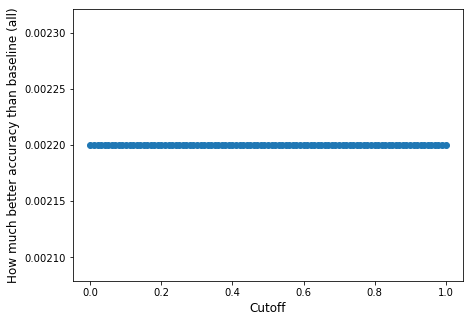

Baseline for bills that passed in the House:

accuracy: #negatives\#observations = 0.9069767441860466
precision: #TP\(#TP+#FP) = undefined
recall: #TP\(#TP+#FN) = 0 

How does accuracy compare to baseline as the cutoffs vary?


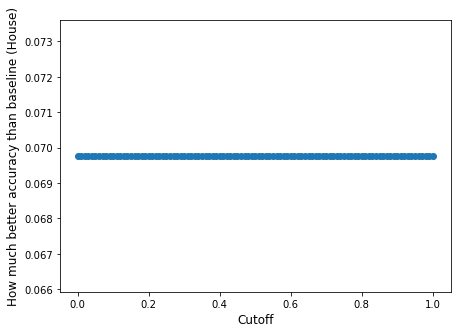

Baseline for bills that passed in the Senate:

accuracy: #negatives\#observations = 0.6666666666666667
precision: #TP\(#TP+#FP) = undefined
recall: #TP\(#TP+#FN) = 0 

How does accuracy compare to baseline as the cutoffs vary?


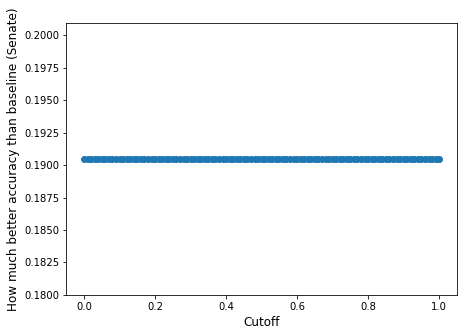

Baseline for bills that passed in both chambers:

accuracy: #negatives\#observations = 0.33333333333333337
precision: #TP\(#TP+#FP) = undefined
recall: #TP\(#TP+#FN) = 0 

How does accuracy compare to baseline as the cutoffs vary?


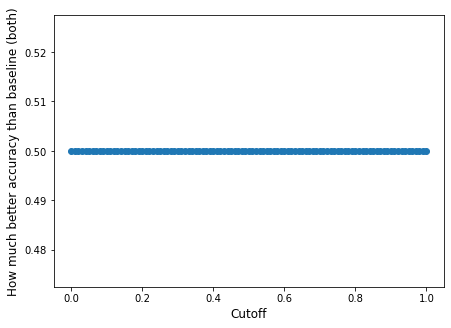

In [5]:
# Baseline model
# What would be the performance metrics of a model that always predicts the bill won't pass?

print("Baseline metrics -- what would happen if the model predicted the bill would not pass \
every time?\n")

# all

print("Baseline for all bills:\n")
print("accuracy: #negatives\#observations = "+str(1 - np.sum(y_val == 1)/len(y_val)))
print("precision: #TP\(#TP+#FP) = undefined")
print("recall: #TP\(#TP+#FN) = 0 ")

print("\nHow does accuracy compare to baseline as the cutoffs vary?")
base_acc = 1 - np.sum(y_val == 1)/len(y_val)

# Store the predicted probabilities (might have to retrain the validation data, 
# if k-fold cross-validation was done)
y_prob = log_reg.predict_proba(X_val)[:,1]

cutoffs = np.arange(0,1.01,.01)
acc_diffs = []
for cutoff in cutoffs:
    y_pred = 1*(y_prob >= cutoff)
    acc_diffs.append(accuracy_score(y_val, log_reg.predict(X_val))-base_acc)

# Plot accuracy - baseline accuracy
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,acc_diffs)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("How much better accuracy than baseline (all)",fontsize=12)
plt.show()

# ----------

# House

print("Baseline for bills that passed in the House:\n")
print("accuracy: #negatives\#observations = "+str(1 - np.sum(y_val_h == 1)/len(y_val_h)))
print("precision: #TP\(#TP+#FP) = undefined")
print("recall: #TP\(#TP+#FN) = 0 ")

print("\nHow does accuracy compare to baseline as the cutoffs vary?")
base_acc_h = 1 - np.sum(y_val_h == 1)/len(y_val_h)

# Store the predicted probabilities (might have to retrain the validation data, 
# if k-fold cross-validation was done)
y_prob_h = log_reg_h.predict_proba(X_val_h)[:,1]

acc_diffs_h = []
for cutoff in cutoffs:
    y_pred_h = 1*(y_prob_h >= cutoff)
    acc_diffs_h.append(accuracy_score(y_val_h, log_reg_h.predict(X_val_h))-base_acc_h)

# Plot accuracy - baseline accuracy
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,acc_diffs_h)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("How much better accuracy than baseline (House)",fontsize=12)
plt.show()

# ----------

# Senate

print("Baseline for bills that passed in the Senate:\n")
print("accuracy: #negatives\#observations = "+str(1 - np.sum(y_val_s == 1)/len(y_val_s)))
print("precision: #TP\(#TP+#FP) = undefined")
print("recall: #TP\(#TP+#FN) = 0 ")

print("\nHow does accuracy compare to baseline as the cutoffs vary?")
base_acc_s = 1 - np.sum(y_val_s == 1)/len(y_val_s)

# Store the predicted probabilities (might have to retrain the validation data, 
# if k-fold cross-validation was done)
y_prob_s = log_reg_s.predict_proba(X_val_s)[:,1]

acc_diffs_s = []
for cutoff in cutoffs:
    y_pred_s = 1*(y_prob_s >= cutoff)
    acc_diffs_s.append(accuracy_score(y_val_s, log_reg_s.predict(X_val_s))-base_acc_s)

# Plot accuracy - baseline accuracy
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,acc_diffs_s)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("How much better accuracy than baseline (Senate)",fontsize=12)
plt.show()

# ----------

# House

print("Baseline for bills that passed in both chambers:\n")
print("accuracy: #negatives\#observations = "+str(1 - np.sum(y_val_b == 1)/len(y_val_b)))
print("precision: #TP\(#TP+#FP) = undefined")
print("recall: #TP\(#TP+#FN) = 0 ")

print("\nHow does accuracy compare to baseline as the cutoffs vary?")
base_acc_b = 1 - np.sum(y_val_b == 1)/len(y_val_b)

# Store the predicted probabilities (might have to retrain the validation data, 
# if k-fold cross-validation was done)
y_prob_b = log_reg_b.predict_proba(X_val_b)[:,1]

acc_diffs_b = []
for cutoff in cutoffs:
    y_pred_b = 1*(y_prob_b >= cutoff)
    acc_diffs_b.append(accuracy_score(y_val_b, log_reg_b.predict(X_val_b))-base_acc_b)

# Plot accuracy - baseline accuracy
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,acc_diffs_b)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("How much better accuracy than baseline (both)",fontsize=12)
plt.show()

In [6]:
# Probability thresholds for the validation set
#
## set the cutoff
#cutoff = 0.75 #input("Specify a cutoff for classification (between 0 and 1):")
#
## store the predicted probabilities (might have to retrain the validation data, 
# if k-fold cross-validation was done)
#y_prob = log_reg.predict_proba(X_val)[:,1]
#
## assign the value based on the cutoff
#y_pred = 1*(y_prob >= cutoff)
#
## print the accuracy
#print("The training accuracy for a cutoff of",cutoff,
#      "is", np.sum(y_pred == y_val)/len(y_val))
#
## print the precision
#print("The training precision for a cutoff of "+str(cutoff)+
#      " is "+str(precision_score(y_val, y_pred))+".")
#
## print the precision
#print("The training recall for a cutoff of "+str(cutoff)+
#      " is "+str(recall_score(y_val, y_pred))+".")

Precision and recall for all bills, given the cutoff:


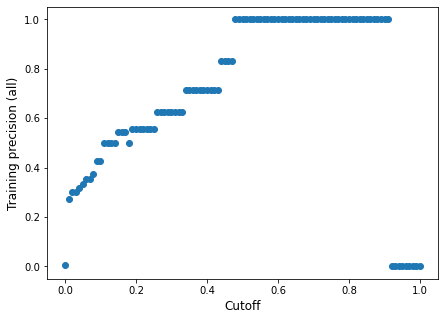

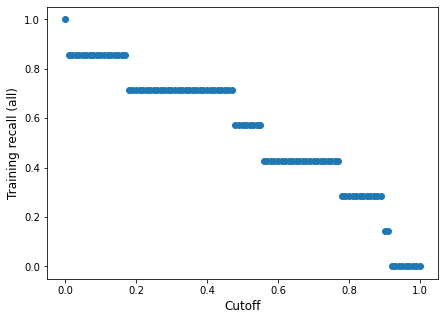


Precision and recall for bills that passed in the House, given the cutoff:


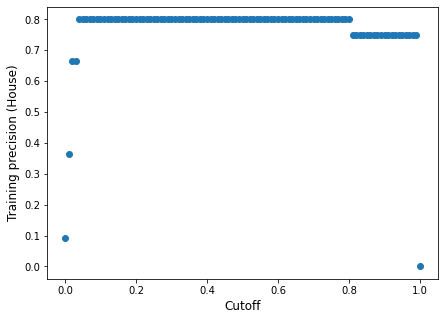

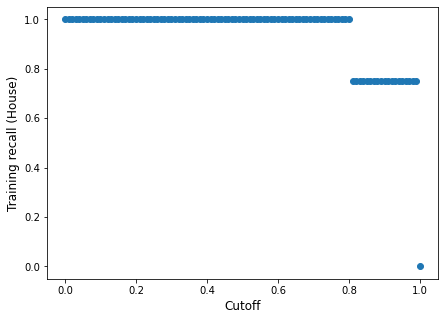


Precision and recall for bills that passed in the Senate, given the cutoff:


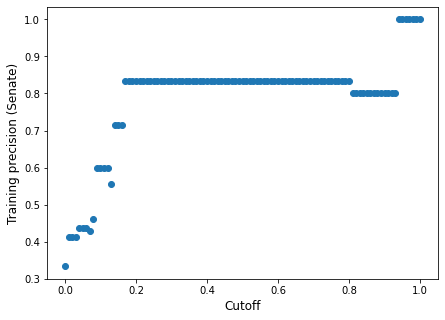

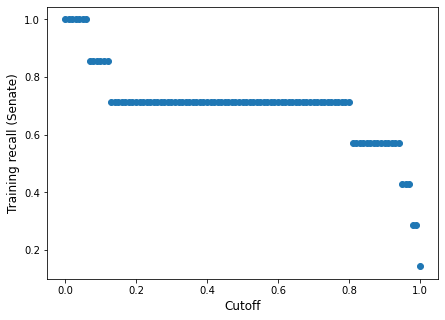


Precision and recall for bills that passed in both chambers, given the cutoff:


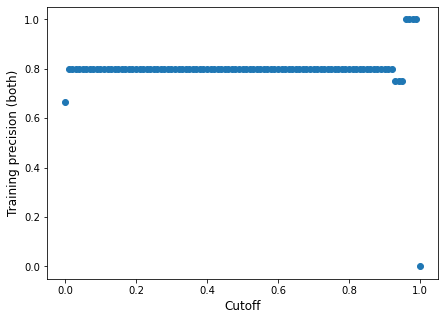

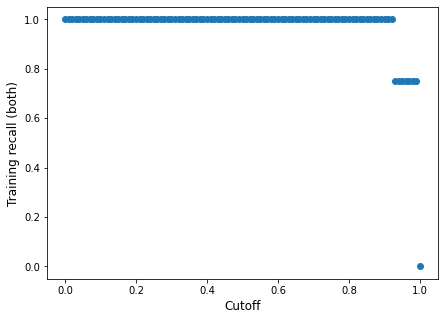

In [7]:
# Now plot how the precision and recall change with the cutoff

# all
print("Precision and recall for all bills, given the cutoff:")
precs = []
recs = []

for cutoff in cutoffs:
    y_pred = 1*(y_prob >= cutoff)
    precs.append(precision_score(y_val, y_pred, zero_division = 0))
    recs.append(recall_score(y_val, y_pred, zero_division = 0))

# Plot precision
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,precs)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training precision (all)",fontsize=12)
plt.show()

# Plot recall
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,recs)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training recall (all)",fontsize=12)
plt.show()

# ----------

# House
print("\nPrecision and recall for bills that passed in the House, given the cutoff:")
precs_h = []
recs_h = []

for cutoff in cutoffs:
    y_pred_h = 1*(y_prob_h >= cutoff)
    precs_h.append(precision_score(y_val_h, y_pred_h, zero_division = 0))
    recs_h.append(recall_score(y_val_h, y_pred_h, zero_division = 0))

# Plot precision
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,precs_h)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training precision (House)",fontsize=12)
plt.show()

# Plot recall
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,recs_h)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training recall (House)",fontsize=12)
plt.show()

# ----------

# Senate
print("\nPrecision and recall for bills that passed in the Senate, given the cutoff:")
precs_s = []
recs_s = []

for cutoff in cutoffs:
    y_pred_s = 1*(y_prob_s >= cutoff)
    precs_s.append(precision_score(y_val_s, y_pred_s, zero_division = 0))
    recs_s.append(recall_score(y_val_s, y_pred_s, zero_division = 0))

# Plot precision
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,precs_s)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training precision (Senate)",fontsize=12)
plt.show()

# Plot recall
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,recs_s)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training recall (Senate)",fontsize=12)
plt.show()

# ----------

# House
print("\nPrecision and recall for bills that passed in both chambers, given the cutoff:")
precs_b = []
recs_b = []

for cutoff in cutoffs:
    y_pred_b = 1*(y_prob_b >= cutoff)
    precs_b.append(precision_score(y_val_b, y_pred_b, zero_division = 0))
    recs_b.append(recall_score(y_val_b, y_pred_b, zero_division = 0))

# Plot precision
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,precs_b)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training precision (both)",fontsize=12)
plt.show()

# Plot recall
plt.figure(figsize=(7,5))
plt.scatter(cutoffs,recs_b)
plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training recall (both)",fontsize=12)
plt.show()

ROC for all bills:
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.902


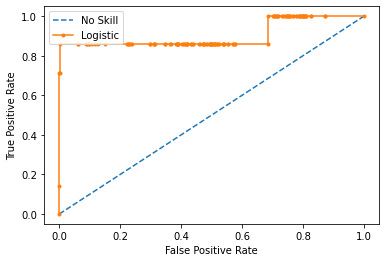


ROC for bills that passed in the House:
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.994


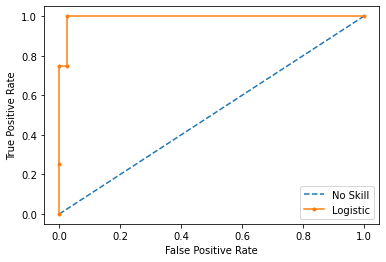


ROC for bills that passed in the Senate:
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.867


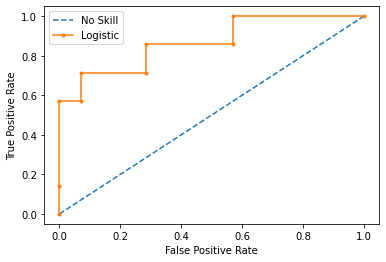


ROC for bills that passed in both chambers:
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.875


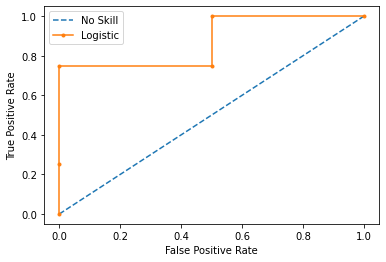

In [8]:
# ROC curve (code from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

# all
print("ROC for all bills:")
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]
# predict probabilities
lr_probs = log_reg.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# ----------

# House
print("\nROC for bills that passed in the House:")
# generate a no skill prediction (majority class)
ns_probs_h = [0 for _ in range(len(y_val_h))]
# predict probabilities
lr_probs_h = log_reg_h.predict_proba(X_val_h)
# keep probabilities for the positive outcome only
lr_probs_h = lr_probs_h[:, 1]
# calculate scores
ns_auc_h = roc_auc_score(y_val_h, ns_probs_h)
lr_auc_h = roc_auc_score(y_val_h, lr_probs_h)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_h))
print('Logistic: ROC AUC=%.3f' % (lr_auc_h))
# calculate roc curves
ns_fpr_h, ns_tpr_h, _ = roc_curve(y_val_h, ns_probs_h)
lr_fpr_h, lr_tpr_h, _ = roc_curve(y_val_h, lr_probs_h)
# plot the roc curve for the model
plt.plot(ns_fpr_h, ns_tpr_h, linestyle='--', label='No Skill')
plt.plot(lr_fpr_h, lr_tpr_h, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# ----------

# Senate
print("\nROC for bills that passed in the Senate:")
# generate a no skill prediction (majority class)
ns_probs_s = [0 for _ in range(len(y_val_s))]
# predict probabilities
lr_probs_s = log_reg_s.predict_proba(X_val_s)
# keep probabilities for the positive outcome only
lr_probs_s = lr_probs_s[:, 1]
# calculate scores
ns_auc_s = roc_auc_score(y_val_s, ns_probs_s)
lr_auc_s = roc_auc_score(y_val_s, lr_probs_s)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_s))
print('Logistic: ROC AUC=%.3f' % (lr_auc_s))
# calculate roc curves
ns_fpr_s, ns_tpr_s, _ = roc_curve(y_val_s, ns_probs_s)
lr_fpr_s, lr_tpr_s, _ = roc_curve(y_val_s, lr_probs_s)
# plot the roc curve for the model
plt.plot(ns_fpr_s, ns_tpr_s, linestyle='--', label='No Skill')
plt.plot(lr_fpr_s, lr_tpr_s, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# ----------

# both
print("\nROC for bills that passed in both chambers:")
# generate a no skill prediction (majority class)
ns_probs_b = [0 for _ in range(len(y_val_b))]
# predict probabilities
lr_probs_b = log_reg_b.predict_proba(X_val_b)
# keep probabilities for the positive outcome only
lr_probs_b = lr_probs_b[:, 1]
# calculate scores
ns_auc_b = roc_auc_score(y_val_b, ns_probs_b)
lr_auc_b = roc_auc_score(y_val_b, lr_probs_b)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_b))
print('Logistic: ROC AUC=%.3f' % (lr_auc_b))
# calculate roc curves
ns_fpr_b, ns_tpr_b, _ = roc_curve(y_val_b, ns_probs_b)
lr_fpr_b, lr_tpr_b, _ = roc_curve(y_val_b, lr_probs_b)
# plot the roc curve for the model
plt.plot(ns_fpr_b, ns_tpr_b, linestyle='--', label='No Skill')
plt.plot(lr_fpr_b, lr_tpr_b, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()